In [1]:
# pip install folium

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

D:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
data_df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
data_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data = data[['iyear', 'imonth', 'iday', 'country_txt', 'city', 'latitude', 'longitude']]
data = data.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'city': 'City', 'latitude': 'Latitude', 'longitude': 'Longitude'})

In [9]:
print(data.isnull().sum())

Year            0
Month           0
Day             0
Country         0
City          434
Latitude     4556
Longitude    4557
dtype: int64


In [10]:
data = data.dropna()

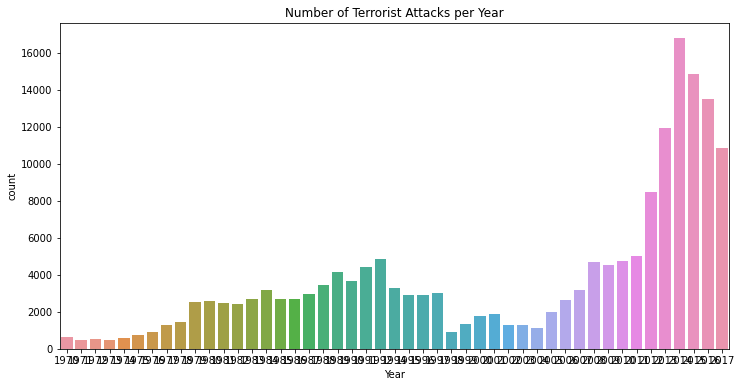

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data)
plt.title('Number of Terrorist Attacks per Year')
plt.show()

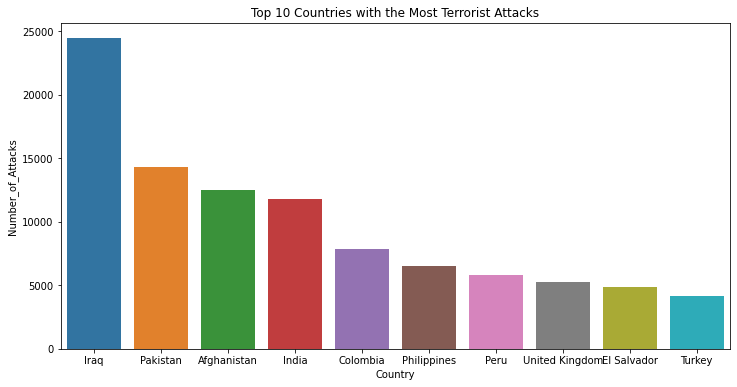

In [12]:
attacks_per_country = data.groupby(['Country']).size().reset_index(name='Number_of_Attacks').sort_values('Number_of_Attacks', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number_of_Attacks', data=attacks_per_country)
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.show()

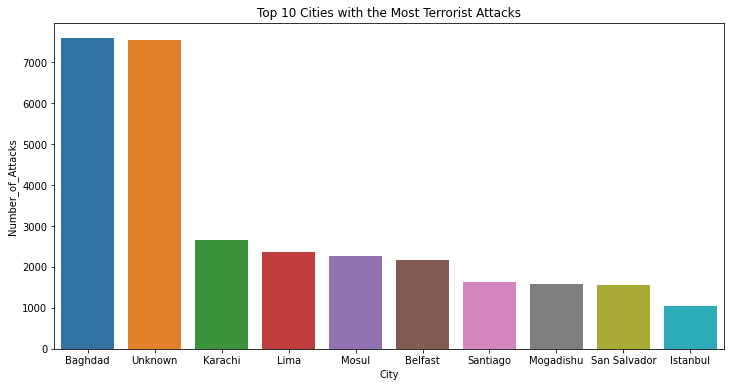

In [13]:
attacks_per_city = data.groupby(['City']).size().reset_index(name='Number_of_Attacks').sort_values('Number_of_Attacks', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Number_of_Attacks', data=attacks_per_city)
plt.title('Top 10 Cities with the Most Terrorist Attacks')
plt.show()


In [14]:
attacks_map = folium.Map(location=[20, 0], tiles='CartoDB Positron', zoom_start=2)
for i, row in data.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=1, color='red', fill=True).add_to(attacks_map)
attacks_map.save('attacks_map.html')